In [1]:
import sys
from pathlib import Path
import json
import time
import matplotlib.pyplot as plt
# Add parent directory to path to access dot_pe modules
sys.path.insert(0, str(Path.cwd().parent))
import numpy as np
from cogwheel import gw_utils, utils

# Import modules from the dot_pe package
from dot_pe import sample_banks, config, waveform_banks

/Users/jonatahm/miniconda3/envs/gwias/lib/python3.11/site-packages/cogwheel/gw_utils.py:4: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [18]:
# select parameters for bank
n_intrinsic_samples = 2**16
f_ref = 50.0
q_min = 1/6
mchirp_min = 50
mchirp_max = 100
bank_name = 'test_bank'
samples_bank_folder = Path('.')/ 'test_bank'
dataframe_path = samples_bank_folder / 'intrinsic_sample_bank.feather'
isg = sample_banks.IntrinsicSamplesGenerator()
# create folder if it does not exist
if samples_bank_folder.exists() is False:
    samples_bank_folder.mkdir()

In [ ]:
start_time = time.time()
samples = isg.draw_intrinsic_samples_uniform_in_lnmchrip_lnq(
    n_intrinsic_samples,
    q_min,
    mchirp_min,
    mchirp_max,
    f_ref=f_ref,
    inc_faceon_factor=1,
)
samples.to_feather(dataframe_path)

end_time = time.time()
message = (
    f"{time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))} :"
    + f" func finished in {end_time - start_time:.2f} seconds."
)
print(message)

2025-07-17 19:37:00 : func finished in 14.93 seconds.


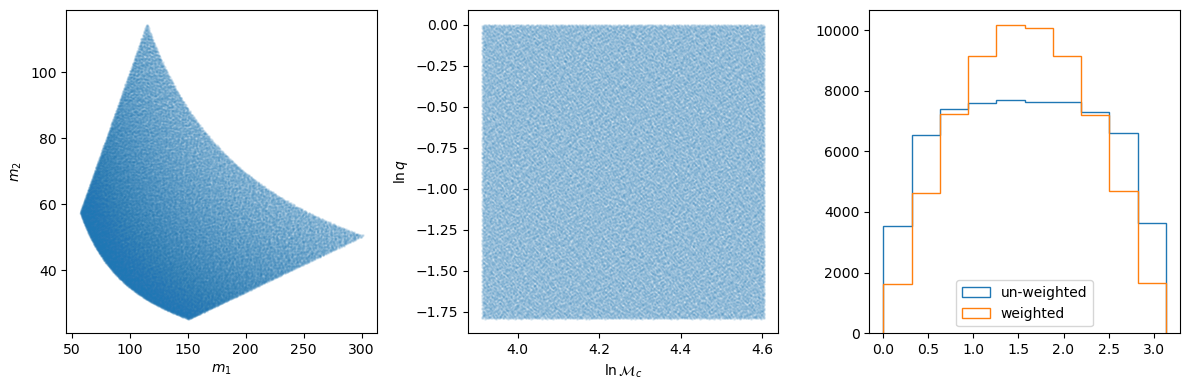

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(samples["m1"], samples["m2"], s=1, alpha=0.1)
axs[0].set_xlabel(r"$m_1$")
axs[0].set_ylabel(r"$m_2$")


lnmchirp = np.log(gw_utils.m1m2_to_mchirp(samples["m1"], samples["m2"]))
lnq = np.log(samples["m2"] / samples["m1"])
axs[1].scatter(lnmchirp, lnq, s=1, alpha=0.1)
axs[1].set_xlabel(r"$\ln \mathcal{M}_c$")
axs[1].set_ylabel(r"$\ln q$")

_ = axs[2].hist(
    samples["iota"],
    histtype="step",
    label="un-weighted"
)
_ = axs[2].hist(
    samples["iota"],
    histtype="step",
    weights=np.exp(samples["log_prior_weights"]),
    label="weighted"
)
axs[2].legend()
fig.tight_layout()

In [19]:
# create config file
bank_config_path = samples_bank_folder / "bank_config.json"
with open(bank_config_path, "w", encoding="utf-8") as fp:
    config_dict = {"fbin": config.DEFAULT_FBIN, "f_ref": f_ref}
    json.dump(config_dict, fp, cls=utils.NumpyEncoder)

In [21]:

waveform_banks.create_waveform_bank_from_samples(
    samples_path=dataframe_path,
    bank_config_path=bank_config_path,
    waveform_dir=dataframe_path.parent / "waveforms",
    n_blocks=None,
    n_pool=4,
    blocksize=4096,
)


2025-07-17 19:52:36,918 - INFO - dot_pe.waveform_banks started at Thu Jul 17 19:52:36 2025
2025-07-17 19:52:36,918 - INFO - dot_pe.waveform_banks started at Thu Jul 17 19:52:36 2025
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-07-17 19:56:22,575 - INFO - dot_pe.waveform_banks finished after 226 seconds (3.76 minutes).
2025-07-17 19:56:22,575 - INFO - dot_pe.waveform_banks finished after 226 seconds (3.76 minutes).


2